In [10]:
import matplotlib.pyplot as plt
import numpy as np
import json

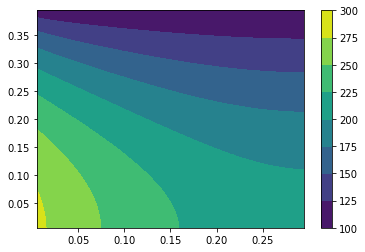

Max Temp = 279.9339840985381


In [11]:
Lx=0.3; Ly=0.4; n = 30; m =40; nn=n*m; # Geom descretization/mesh
Ta=None; Tb=None; Tc=None; Td=100; # BCs
k=1000;  # Properties
 
dx = Lx/n;  dy = Ly/m;   

x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])

dz=0.01;  G=k; qa=500000; qb=0; qc=0; qd=0; 

for j in range(m): 
     for i in range(n): 
        P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n; 
        Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; Sua=qa*Aw; Sub=qb*Ae; Suc=qc*As; Sud=qd*An; 
        aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;
        if(i>0): 
            A[P,W]=-aW; 
        else: 
            if Ta:
                aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;  
            else:
                aW=0; Sp=Sp; Su=Sua + Su;
     
        if(i<n-1): 
            A[P,E]=-aE; 
        else:
            if Tb:
                aE=0; Sp=Sp-2*G*Ae/dx; Su=Su + 2*G*Ae/dx*Tb;
            else:
                aE=0; Sp=Sp; Su=Sub + Su;
        if(j>0): 
            A[P,S]=-aS; 
        else:
            if Tc:
                aS=0; Sp=Sp-2*G*As/dy; Su=Su + 2*G*As/dy*Tc;
            else:
                aS=0; Sp=Sp; Su=Suc + Su;           
        if(j<m-1): 
            A[P,N]=-aN; 
        else:
            if Td:
                aN=0; Sp=Sp-2*G*An/dy; Su=Su + 2*G*An/dy*Td;
            else:
                aN=0; Sp=Sp; Su=Sud + Su;           
        aP = aW + aE + aS + aN - Sp; 
        A[P,P] = aP; 
        #print(A[P,P])
        #print(aP)
        b[P]=Su; 

d=np.linalg.solve(A,b);  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
        
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.colorbar()
plt.show()

print("Max Temp =",max(d))
#print(d)